In [170]:
import pandas as pd
import nltk
import re
nltk.download('stopwords')
from textblob import TextBlob, Word, Blobber
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
def clean_text(text):
    text = re.sub(r'^RT[\s]+','',text)
    text = re.sub(r'https?:\/\/.*[\r\n]*','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    return text

In [172]:
def change(x):
    if x > 0:
        return 'P'
    elif x == 0:
        return 'NEU'
    else:
        return 'N'

In [173]:
df = pd.read_csv('data.csv',sep=',')
df

,user_id,tweet
0,1332502668833599488,"@GKeile Aft #Russia got #Trump electd, #Republ..."
1,1332502657689284610,#Pennsylvania citizens SPEAK OUT! #Trump won
2,1332502614685040640,@milaura105 @Laconic_doc @mrddmia @Cernovich @...
3,1332502588877488128,Trump is the new “Nigerian Prince” #inbreds #T...
4,1332502579738079233,I'm curious how much @realDonaldTrump paid for...
...,...,...
7218,1332250299243913216,#Trump: United States President Donald Trump s...
7219,1332250299189358593,@realDonaldTrump Biden did not *over perform.*...
7220,1332250250543853568,Pa. Commonwealth Court orders halt to certific...
7221,1332250238166458370,"Denial, and Resignation, From Trump and a Hand..."


In [174]:
df['tweet'] =  df['tweet'].apply(clean_text)
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['polarity'] = df['polarity'].apply(change)
df

,user_id,tweet,polarity
0,1332502668833599488,"Aft Russia got Trump electd, Republicans n sh...",NEU
1,1332502657689284610,Pennsylvania citizens SPEAK OUT! Trump won,NEU
2,1332502614685040640,_doc Every court case through Trump cases ...,NEU
3,1332502588877488128,Trump is the new “Nigerian Prince” inbreds Trump,P
4,1332502579738079233,I'm curious how much paid for each of the ext...,P
...,...,...,...
7218,1332250299243913216,Trump: United States President Donald Trump sa...,NEU
7219,1332250299189358593,Biden did not *over perform.*Trump *UNDER* pe...,NEU
7220,1332250250543853568,Pa. Commonwealth Court orders halt to certific...,N
7221,1332250238166458370,"Denial, and Resignation, From Trump and a Hand...",P


In [175]:
x = df['tweet']
y = df['polarity'].to_list()

In [176]:
print('Replica y_train:', sorted(Counter(y).items()))

Replica y_train: [('N', 1590), ('NEU', 3398), ('P', 2235)]


In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=8675309)

In [178]:
print('Replica train: {0}, size {1}'.format(sorted(Counter(y_train).items()), len(y_train)))
print('Replica test: {0}, size {1}'.format(sorted(Counter(y_test).items()), len(y_test)))

Replica train: [('N', 1131), ('NEU', 2381), ('P', 1544)], size 5056
Replica test: [('N', 459), ('NEU', 1017), ('P', 691)], size 2167


# Bag in words


In [179]:
vectorizer = CountVectorizer(max_features=5000, min_df=5, max_df=0.7)

X = vectorizer.fit_transform(df['tweet']).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [189]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=675309)

In [190]:
print('Replica train: {0}, size {1}'.format(sorted(Counter(y_train).items()), len(y_train)))
print('Replica test: {0}, size {1}'.format(sorted(Counter(y_test).items()), len(y_test)))

Replica train: [('N', 1112), ('NEU', 2371), ('P', 1573)], size 5056
Replica test: [('N', 478), ('NEU', 1027), ('P', 662)], size 2167


# Logistic Regresion

In [194]:
classifier = LogisticRegression(C=10, solver='lbfgs', multi_class='multinomial',max_iter=1000) 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(X_test)

In [195]:
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix
[[297 138  43]
 [ 37 945  45]
 [ 30 127 505]]


In [196]:
print('\nClasification Report')
print(classification_report(y_test, y_pred))
cv_score = np.mean(cross_val_score(classifier, x_train,y_train, cv=3, scoring='accuracy'))


Clasification Report
              precision    recall  f1-score   support

           N       0.82      0.62      0.71       478
         NEU       0.78      0.92      0.84      1027
           P       0.85      0.76      0.80       662

    accuracy                           0.81      2167
   macro avg       0.82      0.77      0.79      2167
weighted avg       0.81      0.81      0.80      2167



In [197]:
accuracy = accuracy_score(y_test, y_pred) #% de veces que el modelo acerta
recall = recall_score(y_test, y_pred, average='macro')# el modelo es capar de identificar un 95%
precision = precision_score(y_test, y_pred, average='weighted') # el modelo se equivoca un 5% en las veces que hace la predicción 
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy: {}%'.format(round(accuracy, 2)*100))
print('Recall: {}%'.format(round(recall, 2)*100))
print('Precision: {}%'.format(round(precision, 2)*100))
print('F1: {}%'.format(round(f1, 2)*100))

Accuracy: 81.0%
Recall: 77.0%
Precision: 81.0%
F1: 80.0%


# Random Forest

In [198]:
vectorizer = CountVectorizer(max_features=5000, min_df=5, max_df=0.7)

X = vectorizer.fit_transform(df['tweet']).toarray()
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [199]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=675309)

In [200]:
classifier = RandomForestClassifier(n_estimators=25, random_state=675309)
classifier.fit(X_train2, y_train2) 
y_pred2 = classifier.predict(X_test2)

In [201]:
print('\nConfution matrix : \n',confusion_matrix(y_test2,y_pred2))
print('---------------------------------------------------------------')
print('\n\nClasification report\n ','\n',classification_report(y_test2,y_pred2))


Confution matrix : 
 [[ 275  162   41]
 [  10 1001   16]
 [  20  173  469]]
---------------------------------------------------------------


Clasification report
  
               precision    recall  f1-score   support

           N       0.90      0.58      0.70       478
         NEU       0.75      0.97      0.85      1027
           P       0.89      0.71      0.79       662

    accuracy                           0.81      2167
   macro avg       0.85      0.75      0.78      2167
weighted avg       0.83      0.81      0.80      2167



In [202]:
accuracy = accuracy_score(y_test2, y_pred2) #% de veces que el modelo acerta
recall = recall_score(y_test2, y_pred2, average='macro')# el modelo es capar de identificar un 95%
precision = precision_score(y_test2, y_pred2, average='weighted') # el modelo se equivoca un 5% en las veces que hace la predicción 
f1 = f1_score(y_test2, y_pred2, average='weighted')
print('Accuracy: {}%'.format(round(accuracy, 2)*100))
print('Recall: {}%'.format(round(recall, 2)*100))
print('Precision: {}%'.format(round(precision, 2)*100))
print('F1: {}%'.format(round(f1, 2)*100))

Accuracy: 81.0%
Recall: 75.0%
Precision: 83.0%
F1: 80.0%


# Wordclouds

In [203]:
t_cat=df.groupby('polarity')
positiveTweets=pd.DataFrame()
negativeTweets=pd.DataFrame()

for namec,tweetcat in t_cat:
    if namec=='P':
        positiveTweets=tweetcat
    elif namec=='N':
        negativeTweets=tweetcat

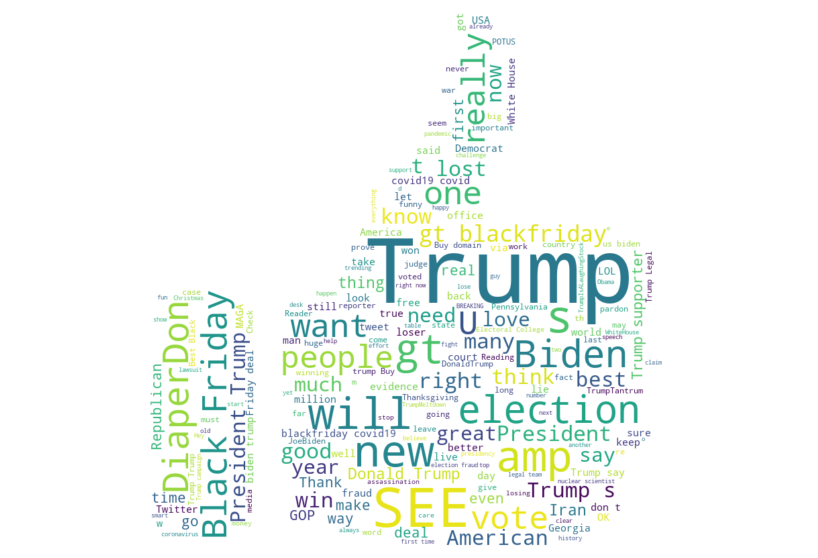

In [204]:
TextP=' '.join(positiveTweets['tweet'].tolist())
mask=np.array(Image.open('like.jpg'))
stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color="white",stopwords=stopwords,mask=mask).generate(TextP)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

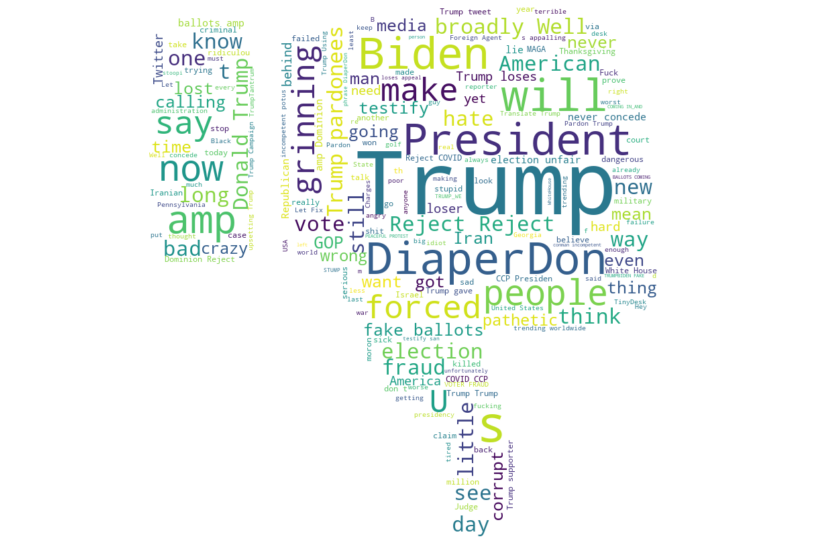

In [205]:
TextN=' '.join(negativeTweets['tweet'].tolist())
mask=np.array(Image.open('dislike.jpg'))
stopwords=set(STOPWORDS)
wordcloud = WordCloud(background_color="white",stopwords=stopwords,mask=mask).generate(TextN)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()